In [1]:
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [11]:
viridish = [(0.2823529411764706, 0.11372549019607843, 0.43529411764705883, 1.0),
            (0.1450980392156863, 0.6705882352941176, 0.5098039215686274, 1.0),
            (0.6901960784313725, 0.8666666666666667, 0.1843137254901961, 1.0)]

In [38]:
def safe_zero_divide(a, b):
    if b == 0:
        return np.nan
    else:
        return a / b

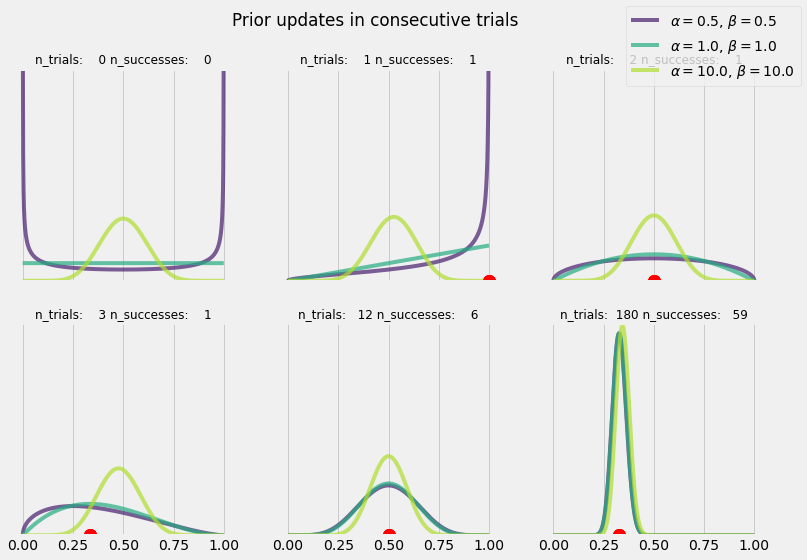

In [54]:
# Generate data
n_trials = [0, 1, 2, 3, 12, 180]
n_success = [0, 1, 1, 1, 6, 59]
data = zip(n_trials, n_success)

# Define  priors
beta_prior_params = [
    (.5, .5),
    (1., 1.),
    (10., 10.)]

# Define parameter space
theta = np.linspace(0, 1, 1500)

# Prepare plotting structure
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 8))
axes = np.ravel(axes)

# Iterate over data
for i, (n, y) in enumerate(data):
    
    # Iterate over Beta priors
    for j, (alpha_prior, beta_prior) in enumerate(beta_prior_params):
        
        # Compute posterior given prior and data
        p_theta_given_y = stats.beta(alpha_prior + y, beta_prior + n - y).pdf(theta)
        
        # Compute point estimate
        
        
        # Plot
        if i == len(n_trials) - 1:
            axes[i].plot(theta, p_theta_given_y, lw=4, color=viridish[j], 
                         label=f'$\\alpha={alpha_prior}$, $\\beta={beta_prior}$', alpha=.7)
        else:
            axes[i].plot(theta, p_theta_given_y, lw=4, color=viridish[j], alpha=.7)
        axes[i].set_yticks([])
        axes[i].set_ylim(0, 12)
        axes[i].plot(safe_zero_divide(y, n), 0, color='red', marker='o', ms=12)
        axes[i].set_title(f'n_trials: {n:4d} n_successes: {y:4d}', fontsize=12)
        
fig.suptitle('Prior updates in consecutive trials')
fig.legend()
        
plt.show()